# Apartment price prediction with sklearn

### Libraries and settings

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

### Import the apartment data

In [2]:
# Read and select variables
df_orig = pd.read_csv("original_apartment_data_analytics_hs24.csv", sep=",", encoding='utf-8')

# Remove missing values
df = df_orig.dropna()
# Remove duplicates
df = df.drop_duplicates()

print(df.shape)
df.head(10)

(819, 14)


,bfs_number,rooms,area,price,postalcode,address,town,description_raw,bfs_name,pop,pop_dens,frg_pct,emp,tax_income
0,118,3.0,49,1441,8630,"Neuhusstrasse 6, 8630 Rüti ZH",Rüti ZH,«Gemütliche Wohnung im Grünen»,Rüti (ZH),12286,1221.272366,24.841283,5053.0,66676
1,118,3.0,111,2600,8630,"Widacherstrasse 5, 8630 Rüti ZH",Rüti ZH,«3 Zimmer-Maisonette-Wohnung»,Rüti (ZH),12286,1221.272366,24.841283,5053.0,66676
2,118,3.0,58,1490,8630,"Widenweg 14, 8630 Rüti ZH",Rüti ZH,"«Ruhig & Grün , Genau was Sie suchen !»",Rüti (ZH),12286,1221.272366,24.841283,5053.0,66676
3,118,4.0,118,3240,8630,"Rain 1, 8630 Rüti ZH",Rüti ZH,«Gemütliches 4-Zimmer-Reihenhaus in zentraler ...,Rüti (ZH),12286,1221.272366,24.841283,5053.0,66676
4,118,3.0,66,1450,8630,"Bachtelstrasse 24b, 8630 Rüti ZH",Rüti ZH,«Schöne 3-Zimmerwohnung in ruhigem Quartier»,Rüti (ZH),12286,1221.272366,24.841283,5053.0,66676
5,118,2.5,61,1307,8630,"Faegswilerstrasse 1, 8630 Rüti ZH",Rüti ZH,«Kleine Attikawohnung mit grossem Charme»,Rüti (ZH),12286,1221.272366,24.841283,5053.0,66676
6,88,3.5,65,1850,8173,"Zürcherstrasse 1, 8173 Neerach",Neerach,«Attraktive 3.5-Zimmer-EG-Wohnung in Neerach»,Neerach,3175,525.662252,13.322835,641.0,110502
7,88,3.5,101,2420,8173,"Vogtmühlestrasse 2, 8173 Neerach",Neerach,«Wohnen im steuergünstigen Neerach»,Neerach,3175,525.662252,13.322835,641.0,110502
8,88,2.5,68,2060,8173,"Vogtmühlestrasse 2, 8173 Neerach",Neerach,«Wohnen im steuergünstigen Neerach»,Neerach,3175,525.662252,13.322835,641.0,110502
9,88,5.5,191,3400,8173,"Steinmaurstrasse 19B, 8173 Neerach",Neerach,«Traumhaft schöne 5 1/2 Zimmer Maisonette-Wohn...,Neerach,3175,525.662252,13.322835,641.0,110502


In [3]:
# Meaning of variables:
# bfs_number: official municipality id
# bfs_name: official municipality name
# pop: number of residents (=population)
# pop_dens: population density (pop per km2)
# frg_pct: percentage foreigners
# emp: numer of employees

df.columns

Index(['bfs_number', 'rooms', 'area', 'price', 'postalcode', 'address', 'town',
       'description_raw', 'bfs_name', 'pop', 'pop_dens', 'frg_pct', 'emp',
       'tax_income'],
      dtype='object')

### Train/Test splitting

In [4]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['rooms', 'area', 'pop', 'pop_dens', 'frg_pct',
                                                        'emp', 'tax_income']], 
                                                         df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

<hr >

### Training the models

#### Questions
- What does the score represent? 
- How is the root mean squared error calculated?
- How good are the model performing? 1=bad, 10=perfect
- Is the LinearRegression model overfitting or underfitting?
- Is the RandomForestRegressor overfitting or underfitting?


In [5]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))
 

Train score:  0.565204508233528
Test score:  0.4293744434882326
Train RMSE:  831.6459165973971
Test RMSE:  974.2410194499224


In [6]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

Train score:  0.884612470314029
Test score:  0.4410240328691283
Train RMSE:  428.4255679355073
Test RMSE:  964.244943176846


<hr >

### Random Forest feature importance

['area' 'rooms' 'pop_dens' 'emp' 'pop' 'tax_income' 'frg_pct']
[0.62250354 0.11204442 0.08101948 0.08055365 0.06399313 0.02561926
 0.01426653]


<Axes: ylabel='features'>

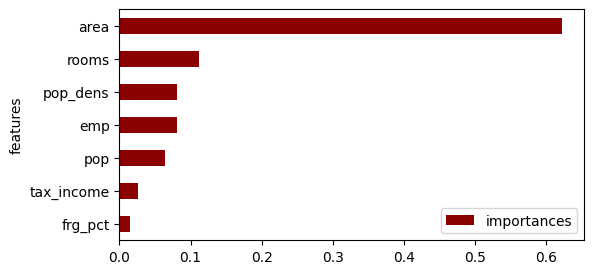

In [7]:
cols = random_forest_model.feature_names_in_

# Derive feature importance from random forest
importances = random_forest_model.feature_importances_
std         = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances',
           x='features', 
           color='darkred', 
           figsize=(6,3))

### Calculate the residuals

In [8]:
# make predictions
y_train_predict = random_forest_model.predict(X_train)
residuals = y_train - y_train_predict

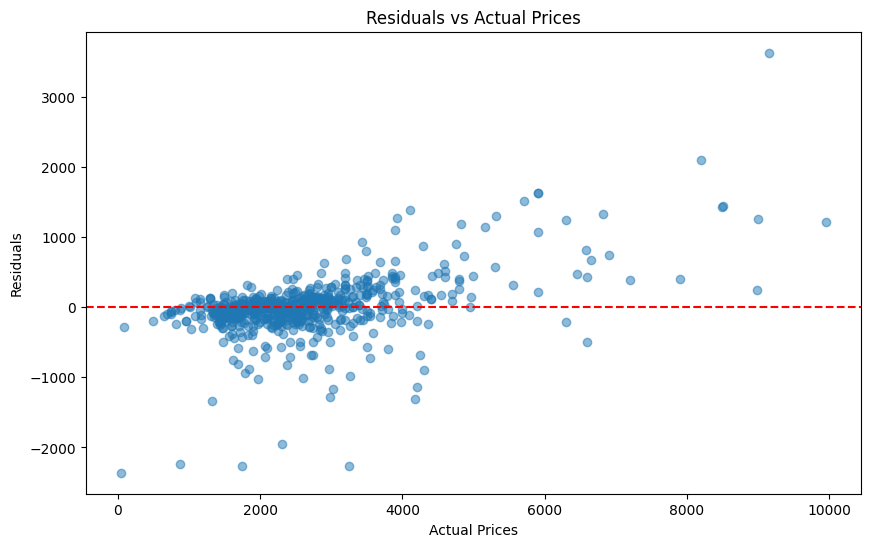

In [9]:
# Calculate residuals

plt.figure(figsize=(10, 6))
plt.scatter(y_train, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Prices')
plt.show()

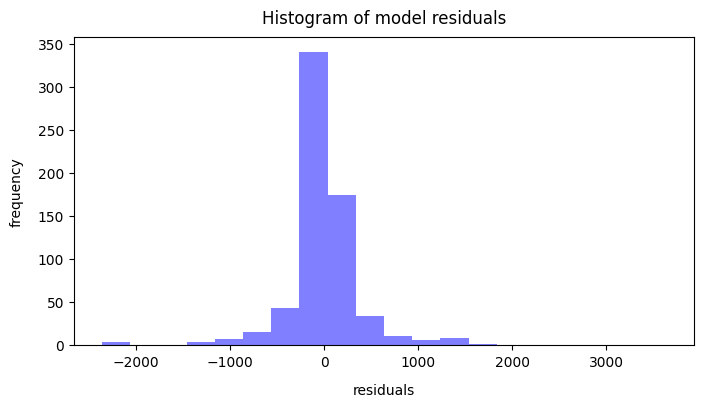

In [10]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=20, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

### Error Analysis

Analyse the predictions. See which towns have the largest error.

In [11]:
# get all predictions for the training set.
y_train_predict = random_forest_model.predict(X_train)
df_with_residual = pd.DataFrame(X_train, columns=X_train.columns, copy=True)
df_with_residual['recidual (error)'] = np.abs(y_train_predict - y_train)
df_with_residual['price'] = y_train
df_with_residual['predicted_price'] = y_train_predict
print(df_with_residual.head())
# Add text, postalcode and town name
# we use join instead of merge, because we 'join' on the index column and do not perform a merge using a specific column
df_with_residual = df_with_residual.join(df[['description_raw', 'bfs_name', 'postalcode', 'town']])

     rooms  area     pop     pop_dens    frg_pct      emp  tax_income  \
774    4.5   147   16841  2623.208723  31.013598  20325.0       86973   
526    2.5    72   18944  2438.095238  37.785051   7507.0       89522   
655    3.5    97   18791  2851.441578  46.117822  18945.0       65678   
581    3.5    83   24990  1486.615110  25.994398  14163.0       68951   
380    1.0    39  113173  1662.597326  24.535004  73339.0       70966   

     recidual (error)  price  predicted_price  
774            212.45   3980          4192.45  
526             83.29   1787          1870.29  
655            177.04   2210          2387.04  
581            159.34   1920          2079.34  
380             16.08   1265          1248.92  


In [12]:
# check which location has the largest errors.
df_with_residual[(df_with_residual['recidual (error)'] > 500)].groupby(['pop', 'bfs_name']).size().sort_values(ascending=False)

pop     bfs_name     
420217  Zürich           63
35007   Uster             2
7228    Oberglatt         1
4840    Oetwil am See     1
16841   Wallisellen       1
9345    Niederhasli       1
dtype: int64

In [13]:

df_with_residual[(df_with_residual['recidual (error)'] > 500)]['description_raw'].to_csv('data_with_large_residuals.csv', 
          sep=",", 
          encoding='utf-8',
          index=False)